# COSC311 - Lab 2
### JJ McCauley

In [40]:
''' --- Imports --- '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Formatting graphs

## Task 1

In [41]:
b_df = pd.read_csv("Bejaia_Region.csv")  # Bejaia Region Dataset
print(b_df)
# Display the Bejaia Region Dataset Info & Statistics
print(b_df.info())
print(b_df.describe())
print("Unique Values of Wind Speed: ", b_df['Ws'].unique())
print("Sample Count: ", b_df['day'].count())

     day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0      1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1      2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2      3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3      4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4      5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...  ...   ...  ...  ...   
117   26      9  2012           31  54  11   0.0  82.0  6.0  16.3  2.5  6.2   
118   27      9  2012           31  66  11   0.0  85.7  8.3  24.9  4.0  9.0   
119   28      9  2012           32  47  14   0.7  77.5  7.1   8.8  1.8  6.8   
120   29      9  2012           26  80  16   1.8  47.4  2.9   7.7  0.3  3.0   
121   30      9  2012           25  78  14   1.4  45.0  1.9   7.5  0.2  2.4   

     FWI    Classes    
0    0.5  not fire     
1  

In [42]:
s_df = pd.read_csv("Sidi-Bel_Abbes_Region.csv")  # Sidi-Bel Abbes Region Update
# Display the Sidi-Bel Abbes Region Dataset Info & Statistics
print(s_df.info())
print(s_df.describe())
print("Unique Values of Wind Speed: ", s_df['Ws'].unique())
print("Sample Count: ", s_df['day'].count())

ParserError: Error tokenizing data. C error: Expected 14 fields in line 45, saw 15


## Task 2

<Axes: title={'center': 'Temperature over Time'}, xlabel='Date', ylabel='Temperature'>

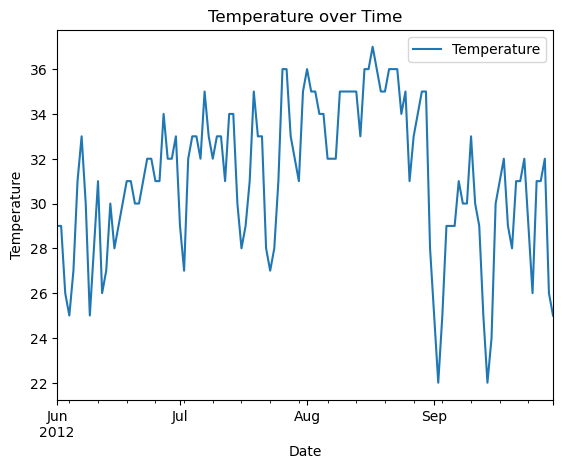

In [26]:
b_df['Date'] = pd.to_datetime(b_df[['year', 'month', 'day']])  # Creating new column for date
b_df.plot.line(x='Date', y='Temperature', title='Temperature over Time', ylabel='Temperature')

## Task 3

<Axes: title={'center': 'Relation between Temperature and FWI'}, xlabel='Temperature', ylabel='FWI'>

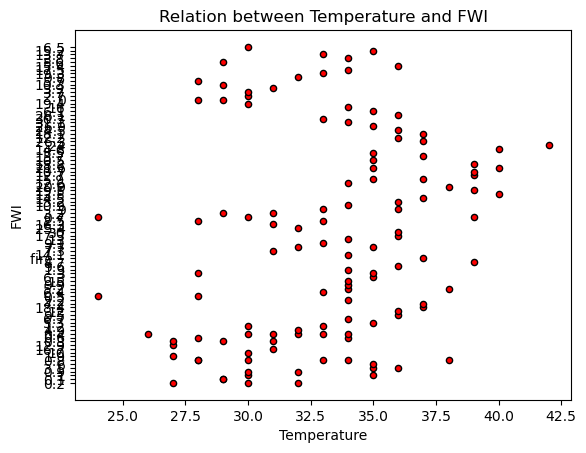

In [69]:
s_df.plot.scatter(x='Temperature', y='FWI', title='Relation between Temperature and FWI', color='red', edgecolor='k')


## Task 4
Using Bar graph approach

Text(0, 0.5, 'Average RH')

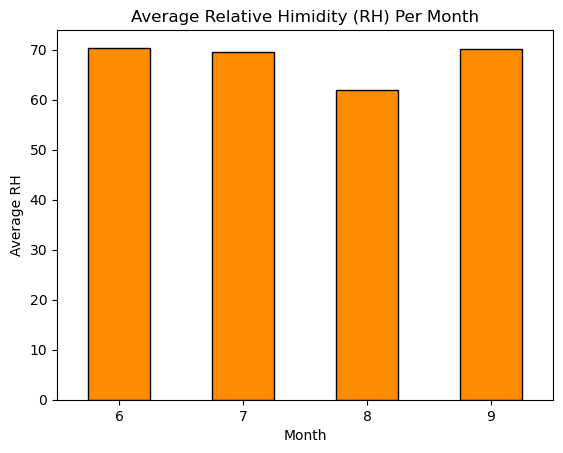

In [73]:
avg_RH_per_month = b_df.groupby('month')['RH'].mean()
avg_RH_per_month.plot(kind='bar', edgecolor='k', facecolor='darkorange')
plt.title('Average Relative Himidity (RH) Per Month')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Average RH')

## Task 5

draw a bar figure to show the maximum Rain amount in a day for each month for the 
"Bejaia Region Dataset"

month
6    13.1
7     1.4
8    16.8
9    10.1
Name: Rain, dtype: float64


Text(0, 0.5, 'Rainfall in One Day')

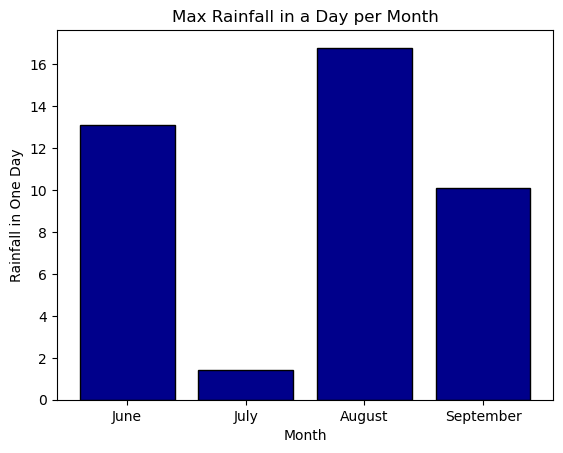

In [92]:
#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
b_df_temp = b_df.copy()  # Explicitly make a temporary copy to change dates into strings (and clear warnings)
b_df_temp['month'] = pd.to_datetime(b_df['month'], format='%m').dt.strftime('%B')  # https://www.geeksforgeeks.org/pandas-series-dt-strftime/
unique_months = b_df_temp['month'].unique()
max_rain_per_month = b_df.groupby(['month'])['Rain'].max()
print(max_rain_per_month)
plt.bar(unique_months, max_rain_per_month, edgecolor='k', color='darkblue', zorder=1)
plt.title('Max Rainfall in a Day per Month')
plt.xlabel('Month')
plt.ylabel('Rainfall in One Day')
#plt.grid(True)

## Task 6

draw a histogram to show the Wind speed (Ws) distribution in 5 bins for the "Sidi-Bel 
Abbes Region Dataset" in June, 2012

Text(0, 0.5, 'Frequency')

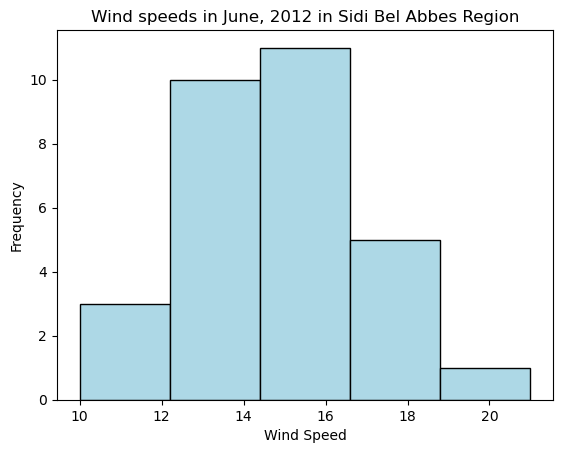

In [111]:
s_df_june_2012 = s_df[(s_df['year'] == 2012) & (s_df['month'] == 6)]  # Detaching June 2012 from df
wind_speeds_june_2012 = s_df_june_2012['Ws']  # Getting just the wind speeds
plt.hist(wind_speeds_june_2012, bins=5, color='lightblue', ec='k')
plt.title('Wind speeds in June, 2012 in Sidi Bel Abbes Region')
plt.xlabel("Wind Speed")
plt.ylabel("Frequency")


## Task 7

draw a line figure to show the correlation between temperature (Temp) and Relative 
Humidity (RH) for the "Sidi-Bel Abbes Region Dataset" in July, 2012

Text(0, 0.5, 'Relative Humidity (RH)')

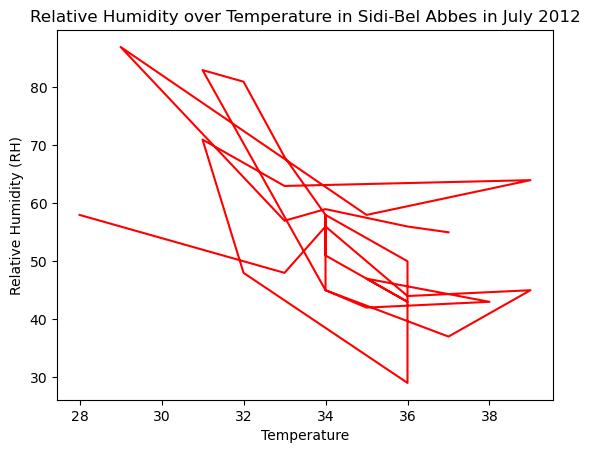

In [115]:
s_df_july_2012 = s_df[(s_df['year'] == 2012) & (s_df['month'] == 7)]
s_july_2012_temp = s_df_july_2012['Temperature']
s_july_2012_rh = s_df_july_2012['RH']
plt.plot(s_july_2012_temp,s_july_2012_rh, color='red')
plt.title("Relative Humidity over Temperature in Sidi-Bel Abbes in July 2012")
plt.xlabel('Temperature')
plt.ylabel('Relative Humidity (RH)')

## Task 8

draw a bar figure to show the distribution of Relative Humidity (RH) for the "Bejaia 
Region Dataset". The x-axis is the decile of Relative Humidity (20s, 30s, ..., 90s), and y-axis is the 
number of days

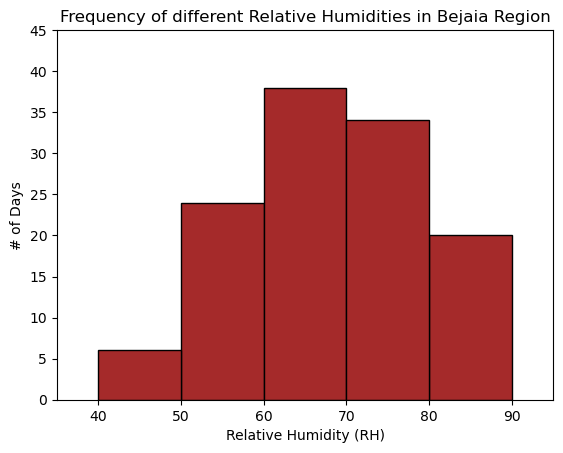

In [126]:
from collections import Counter
b_RH = b_df['RH']  # Isolating th Bejaia Relative Humidities

# Bucket RH by 10
histogram = Counter(rh // 10 * 10 for rh in b_RH)

plt.bar([x + 5 for x in histogram.keys()], histogram.values(), 10, color='brown', edgecolor='k')

plt.axis([35, 95, 0, 45])

plt.title('Frequency of different Relative Humidities in Bejaia Region')
plt.xlabel("Relative Humidity (RH)")
plt.ylabel("# of Days")
plt.show()

## Task 9

draw a figure (any type you want) to show the average temperature for each month when 
there is "no fire" and there is "fire" for the "Bejaia Region Dataset"

In [ ]:
# Line graph w/ 2 lines
#b_monthly_temp_fire